
# 1.Pandas是什么
## 1.1Pandas介绍
- panel + data + analysis
    - panel 面板 panel data 面板数据，来源计量经济学 三维数据
- 数据处理工具
- 2008年WesMcKinney开发的库
- 专门用于数据挖掘的开源python库
- 以Numpy为基础，借力Numpy模块在计算方面性能高的优势
- 基于matplotlib，能够简便的画图
- 独特的数据结构

### 1.1.1 三大核心数据结构
- Series
    - 带索引的一维数组
- DataFrame
    - 带行索引和列索引的二维数组，DataFrame是Series的容器
- Panel 
    - MultiIndex与Panel是多维数组
    - Panel是DataFrame的容器

## 1.2使用Pandas的原因
- 便捷的数据处理能力
    - 填写缺失值数据 替换 插补
- 读取文件方便
- 封装类Matplotlib, Numpy的画图和计算

## 1.3DataFrame是什么
### 1.3.1DataFrame结构
- 结构: 既有行索引，又有列索引的二维数组
    - 行索引，表名不同行，横向索引，叫做index
    - 列索引，表名不同列，纵向索引，叫做colums
- 对数组添加索引 
    - **pd.DataFrame(data, index=, columns=)**
    
- 之前我们学过用numpy创建一组数组
    - 但是这样的数据形式很难看见存储的是什么数据，并且也很难获取相应的数据，比如需要获取某个指定股票的数据，很难去获取
    - 如何让这组数据更具有意义的显示, 加上行列索引

In [1]:
# 创建一个符合正态分布的10个股票5天的涨跌幅数据
import random
import numpy as np
stock_change = np.random.normal(0,1,(10,5)) # 平均值为0 标准差为1
stock_change

array([[-2.88930929,  1.06208805, -0.81747296,  0.87739496, -0.20367112],
       [-0.70722712,  0.48723569, -0.10825984,  0.70359771,  0.27915139],
       [ 0.9442169 ,  0.13705276, -0.26357038,  0.30899069, -0.94255207],
       [ 0.06840124,  0.54415478,  1.14323114, -2.21144013,  0.47734736],
       [ 0.55006495, -1.20030068, -0.31836639,  0.04335795,  0.88296565],
       [ 1.08918624,  0.21427402,  0.89084096,  0.78331328,  0.51354345],
       [-1.5955959 ,  0.15088959,  1.32161663, -0.21814411, -1.14305486],
       [ 1.30811061, -0.06995822,  0.11961735,  0.19511925,  1.0163857 ],
       [-0.20727431, -0.19602524,  1.3193415 , -1.44576033,  0.07855679],
       [-0.97853232,  2.16066258,  0.01954552, -0.36506106, -0.12084304]])

In [2]:
import pandas as pd
pd.DataFrame(stock_change)
# 手动添加索引

,0,1,2,3,4
0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
1,-0.707227,0.487236,-0.108260,0.703598,0.279151
2,0.944217,0.137053,-0.263570,0.308991,-0.942552
3,0.068401,0.544155,1.143231,-2.211440,0.477347
4,0.550065,-1.200301,-0.318366,0.043358,0.882966
5,1.089186,0.214274,0.890841,0.783313,0.513543
6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
7,1.308111,-0.069958,0.119617,0.195119,1.016386
8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [3]:
# 添加行索引
# 构造一个字符串
stock = ["股票 {}".format(i) for i in range(10)]
pd.DataFrame(stock_change, index = stock)

,0,1,2,3,4
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票 3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票 4,0.550065,-1.200301,-0.318366,0.043358,0.882966
股票 5,1.089186,0.214274,0.890841,0.783313,0.513543
股票 6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票 7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票 8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票 9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [4]:
# 添加列索引, 日期索引
# 交易日
date =pd.date_range(start="20190101",periods=5,freq="B")
pd.DataFrame(stock_change, index = stock, columns = date)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票 3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票 4,0.550065,-1.200301,-0.318366,0.043358,0.882966
股票 5,1.089186,0.214274,0.890841,0.783313,0.513543
股票 6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票 7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票 8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票 9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


### 1.3.2DataFrame属性
- 常用属性：
    - **shape**
        - data.shape
    - **index**
        - data.index
    - **columns**
        - data.columns
    - **values**
        - data.values 直接获取其中array的值
    - **T**
        - 行列转置
    
- 方法：
    - 想看数据构成，有哪些字段，又不想把所有的数据都显示出来
    - **head()**
    - **tail()**


In [5]:
data = pd.DataFrame(stock_change, index = stock, columns = date)
data # 十行五列的二维数组 shape(10,5)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票 3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票 4,0.550065,-1.200301,-0.318366,0.043358,0.882966
股票 5,1.089186,0.214274,0.890841,0.783313,0.513543
股票 6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票 7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票 8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票 9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [6]:
data.shape

(10, 5)

In [7]:
data.index

Index(['股票 0', '股票 1', '股票 2', '股票 3', '股票 4', '股票 5', '股票 6', '股票 7', '股票 8',
       '股票 9'],
      dtype='object')

In [8]:
data.columns

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

In [14]:
data.values

array([[-2.88930929,  1.06208805, -0.81747296,  0.87739496, -0.20367112],
       [-0.70722712,  0.48723569, -0.10825984,  0.70359771,  0.27915139],
       [ 0.9442169 ,  0.13705276, -0.26357038,  0.30899069, -0.94255207],
       [ 0.06840124,  0.54415478,  1.14323114, -2.21144013,  0.47734736],
       [ 0.55006495, -1.20030068, -0.31836639,  0.04335795,  0.88296565],
       [ 1.08918624,  0.21427402,  0.89084096,  0.78331328,  0.51354345],
       [-1.5955959 ,  0.15088959,  1.32161663, -0.21814411, -1.14305486],
       [ 1.30811061, -0.06995822,  0.11961735,  0.19511925,  1.0163857 ],
       [-0.20727431, -0.19602524,  1.3193415 , -1.44576033,  0.07855679],
       [-0.97853232,  2.16066258,  0.01954552, -0.36506106, -0.12084304]])

In [15]:
data.T

,股票 0,股票 1,股票 2,股票 3,股票 4,股票 5,股票 6,股票 7,股票 8,股票 9
2019-01-01,-2.889309,-0.707227,0.944217,0.068401,0.550065,1.089186,-1.595596,1.308111,-0.207274,-0.978532
2019-01-02,1.062088,0.487236,0.137053,0.544155,-1.200301,0.214274,0.150890,-0.069958,-0.196025,2.160663
2019-01-03,-0.817473,-0.108260,-0.263570,1.143231,-0.318366,0.890841,1.321617,0.119617,1.319342,0.019546
2019-01-04,0.877395,0.703598,0.308991,-2.211440,0.043358,0.783313,-0.218144,0.195119,-1.445760,-0.365061
2019-01-07,-0.203671,0.279151,-0.942552,0.477347,0.882966,0.513543,-1.143055,1.016386,0.078557,-0.120843


In [10]:
data.head()
#默认返回前5行

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票 3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票 4,0.550065,-1.200301,-0.318366,0.043358,0.882966


In [11]:
data.head(3)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552


In [13]:
data.tail() #  默认返回后5行

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 5,1.089186,0.214274,0.890841,0.783313,0.513543
股票 6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票 7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票 8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票 9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


### 1.3.3DataFrame索引的设置
- 修改行列索引值
    - 不能单独修改，必须要整体修改
- 重设索引
    - reset_index(drop=False)
        - 设置新的下标索引
        - drop：默认是False，不删除原来的索引，如果为True，删除原来的索引值
- 设置新的索引

#### 1修改行列索引值
- 修改行列索引值
    - 不能单独修改，必须要整体修改
- **data.index = new_index**

In [16]:
data.head()

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票 1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票 2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票 3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票 4,0.550065,-1.200301,-0.318366,0.043358,0.882966


In [17]:
data.index[2] = "股票88" # 不能单独修改，必须要整体修改

TypeError: Index does not support mutable operations

In [18]:
stock_ = ["股票_{}".format(i) for i in range(10)]
stock_

['股票_0',
 '股票_1',
 '股票_2',
 '股票_3',
 '股票_4',
 '股票_5',
 '股票_6',
 '股票_7',
 '股票_8',
 '股票_9']

In [19]:
data.index

Index(['股票 0', '股票 1', '股票 2', '股票 3', '股票 4', '股票 5', '股票 6', '股票 7', '股票 8',
       '股票 9'],
      dtype='object')

In [20]:
data.index = stock_
data.index

Index(['股票_0', '股票_1', '股票_2', '股票_3', '股票_4', '股票_5', '股票_6', '股票_7', '股票_8',
       '股票_9'],
      dtype='object')

In [21]:
data

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票_0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票_1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票_2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票_3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票_4,0.550065,-1.200301,-0.318366,0.043358,0.882966
股票_5,1.089186,0.214274,0.890841,0.783313,0.513543
股票_6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票_7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票_8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票_9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


#### 2重设索引
- **reset_index(drop=False)**
    - 设置新的下标索引
    - drop:默认为False，不删除原来索引，如果为True，删除原来的索引值

In [22]:
data.reset_index()

,index,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
0,股票_0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
1,股票_1,-0.707227,0.487236,-0.108260,0.703598,0.279151
2,股票_2,0.944217,0.137053,-0.263570,0.308991,-0.942552
3,股票_3,0.068401,0.544155,1.143231,-2.211440,0.477347
4,股票_4,0.550065,-1.200301,-0.318366,0.043358,0.882966
5,股票_5,1.089186,0.214274,0.890841,0.783313,0.513543
6,股票_6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
7,股票_7,1.308111,-0.069958,0.119617,0.195119,1.016386
8,股票_8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
9,股票_9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [23]:
data.reset_index().shape # 多了一列

(10, 6)

In [24]:
data.reset_index(drop = True)  # 原来索引那列被删除了

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
1,-0.707227,0.487236,-0.108260,0.703598,0.279151
2,0.944217,0.137053,-0.263570,0.308991,-0.942552
3,0.068401,0.544155,1.143231,-2.211440,0.477347
4,0.550065,-1.200301,-0.318366,0.043358,0.882966
5,1.089186,0.214274,0.890841,0.783313,0.513543
6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
7,1.308111,-0.069958,0.119617,0.195119,1.016386
8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [25]:
data.reset_index(drop = True).shape

(10, 5)

#### 3设置新的索引
- **set_index(keys,drop=True)**
    - 原来的索引扔掉类，数据集内某一列作为新的列索引
    - keys: 列索引名称或者列索引名称的列表
    - drop： boolean，default True，当做新的索引，删除原来的列
- 用字典生成dataframe

In [26]:
# 用字典生成dataframe
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})

In [28]:
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


In [30]:
# 以月份设置成新的索引
df.set_index("month")

,sale,year
month,,
1,55,2012
4,40,2014
7,84,2013
10,31,2014


In [31]:
df.set_index("month", drop = False)

,month,sale,year
month,,,
1,1,55,2012
4,4,40,2014
7,7,84,2013
10,10,31,2014


In [32]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [33]:
# month和sale都做为索引
new_def = df.set_index(["month","year"])
new_def

,,sale
month,year,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [34]:
new_def.index

MultiIndex(levels=[[1, 4, 7, 10], [2012, 2013, 2014]],
           labels=[[0, 1, 2, 3], [0, 2, 1, 2]],
           names=['month', 'year'])

## 1.4MultiIndex与Panel是什么
- 可以用来表示三维数据了
- 通过刚才的设置，这样 Data Frame就变成类一个具有MultiIndex的DataFrame
- 三维数组推荐使用MultiIndex 不推荐使用Panel
### 1.4.1MultiIndex是什么
- 多级或分层索引对象
- indexd的属性
    - **names**：levels的名称
    - **levels**： 每个level的元组值

In [35]:
new_def.index

MultiIndex(levels=[[1, 4, 7, 10], [2012, 2013, 2014]],
           labels=[[0, 1, 2, 3], [0, 2, 1, 2]],
           names=['month', 'year'])

In [36]:
new_def.index.names ## 这样的一个data frame，有几个索引，索引的名字

FrozenList(['month', 'year'])

In [37]:
new_def.index.levels  ##

FrozenList([[1, 4, 7, 10], [2012, 2013, 2014]])

### 1.4.2Panel是什么
- 用来存储三维结构的面板
- class pandas.Panel(data=None,items=None,major_axis=None,minor_axis=None,copy=False,dtype=None)
- **Panel看出data frame的容器**
- **items axis 0**, 每个项目对应于内部包含的数据帧(DataFrame)
- **major_axis axis 1**, 他是每个数据帧(DataFrame)的索引(行)
- **minor_axis axis 2**, 他是每个数据帧(DataFrame)的列
- 推荐使用用于表示3D数据的方法是DataFrame上的MultiIndex的方法

In [39]:
p = pd.Panel(np.arange(24).reshape(4,3,2),
                 items=list('ABCD'),
                 major_axis=pd.date_range('20130101', periods=3),
                 minor_axis=['first', 'second'])
p

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 3 (major_axis) x 2 (minor_axis)
Items axis: A to D
Major_axis axis: 2013-01-01 00:00:00 to 2013-01-03 00:00:00
Minor_axis axis: first to second

In [43]:
p["A"]

,first,second
2013-01-01,0,1
2013-01-02,2,3
2013-01-03,4,5


In [44]:
p["B"]

,first,second
2013-01-01,6,7
2013-01-02,8,9
2013-01-03,10,11


In [45]:
p.major_xs("20130101")

,A,B,C,D
first,0,6,12,18
second,1,7,13,19


In [46]:
p.minor_xs("first")

,A,B,C,D
2013-01-01,0,6,12,18
2013-01-02,2,8,14,20
2013-01-03,4,10,16,22


## 1.5Series是什么

- 带索引的一维数组
- series结构只有行索引
- 属性
    - index
    - values 一维数组 ndarray
- 方法
### 1.5.1eries获取索引和值
- index
- values

In [47]:
data

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票_0,-2.889309,1.062088,-0.817473,0.877395,-0.203671
股票_1,-0.707227,0.487236,-0.108260,0.703598,0.279151
股票_2,0.944217,0.137053,-0.263570,0.308991,-0.942552
股票_3,0.068401,0.544155,1.143231,-2.211440,0.477347
股票_4,0.550065,-1.200301,-0.318366,0.043358,0.882966
股票_5,1.089186,0.214274,0.890841,0.783313,0.513543
股票_6,-1.595596,0.150890,1.321617,-0.218144,-1.143055
股票_7,1.308111,-0.069958,0.119617,0.195119,1.016386
股票_8,-0.207274,-0.196025,1.319342,-1.445760,0.078557
股票_9,-0.978532,2.160663,0.019546,-0.365061,-0.120843


In [48]:
sr = data.iloc[1,:]  #股票1的数据，抽取了一行
sr

2019-01-01   -0.707227
2019-01-02    0.487236
2019-01-03   -0.108260
2019-01-04    0.703598
2019-01-07    0.279151
Freq: B, Name: 股票_1, dtype: float64

In [49]:
sr.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

In [50]:
sr.values 

array([-0.70722712,  0.48723569, -0.10825984,  0.70359771,  0.27915139])

In [51]:
data.iloc[1,:]

2019-01-01   -0.707227
2019-01-02    0.487236
2019-01-03   -0.108260
2019-01-04    0.703598
2019-01-07    0.279151
Freq: B, Name: 股票_1, dtype: float64

In [82]:
data.iloc[1,:].index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

### 1.5.2Series创建
- 通过已有数据创建
    - 指定内容，默认索引
        - **pd.Series(np.arange(10))**
    - 指定索引
        - **pd.Series([6.7,5.6,3,10,2],index=['A','B','C'])**
    - 通过字典数据创建
        -**pd.Series({'red':100,'blue':200,'green':500,'yellow'})**

In [52]:
# Series是带索引的一维数组，所以第一列为索引 
pd.Series(np.arange(3,9,2))

0    3
1    5
2    7
dtype: int32

In [53]:
pd.Series(np.arange(3,9,2),index=['A','B','C'])

A    3
B    5
C    7
dtype: int32

In [54]:
pd.Series({'red':3,'blue':5,'yellow':7})

blue      5
red       3
yellow    7
dtype: int64

In [55]:
pd.Series([6.7,5.6,3,10,2],index=[1,2,3,4,5])

1     6.7
2     5.6
3     3.0
4    10.0
5     2.0
dtype: float64

In [56]:
pd.Series({'red':100,'blue':200,'green':500,'yellow':7})

blue      200
green     500
red       100
yellow      7
dtype: int64

# 2基础数据操作

In [97]:
# 读取文件
data = pd.read_csv("stock_day.csv")
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [73]:
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)

## 2.1索引操作
### 2.1.1直接索引 
- **必须先列后行**


In [76]:
# numpy当中我们已经讲过使用索引选取序列和切片选择
stock_change

array([[-2.88930929,  1.06208805, -0.81747296,  0.87739496, -0.20367112],
       [-0.70722712,  0.48723569, -0.10825984,  0.70359771,  0.27915139],
       [ 0.9442169 ,  0.13705276, -0.26357038,  0.30899069, -0.94255207],
       [ 0.06840124,  0.54415478,  1.14323114, -2.21144013,  0.47734736],
       [ 0.55006495, -1.20030068, -0.31836639,  0.04335795,  0.88296565],
       [ 1.08918624,  0.21427402,  0.89084096,  0.78331328,  0.51354345],
       [-1.5955959 ,  0.15088959,  1.32161663, -0.21814411, -1.14305486],
       [ 1.30811061, -0.06995822,  0.11961735,  0.19511925,  1.0163857 ],
       [-0.20727431, -0.19602524,  1.3193415 , -1.44576033,  0.07855679],
       [-0.97853232,  2.16066258,  0.01954552, -0.36506106, -0.12084304]])

In [77]:
stock_change[1,2]

-0.10825983752577428

In [78]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


- data[2,1] #不能进行直接进行数字索引

In [80]:
##必须先列后行
data["open"]["2018-02-26"]

22.800000000000001

### 2.1.2按名字索引
- **loc** 使用索引

In [81]:
data.loc["2018-02-26"]["open"]

22.800000000000001

In [82]:
data.loc["2018-02-26","open"]

22.800000000000001

### 2.1.3按数字索引
- **iloc**使用索引

In [83]:
data.iloc[1,0]

22.800000000000001

### 2.1.4组合索引
- 数字和名字混用
- **ix**

In [86]:
data.ix[0:4,['open','close','high','low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


### 2.1.5推荐使用名字索引和数字索引

In [98]:
data.index[0:4]

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22'], dtype='object')

In [93]:
data.index.get_indexer(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22'])

array([0, 1, 2, 3], dtype=int64)

In [89]:
data.loc[data.index[0:4],['open','close','high','low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


In [90]:
data.columns.get_indexer(['open','close','high','low'])

array([0, 2, 1, 3], dtype=int64)

In [88]:
data.iloc[0:4,data.columns.get_indexer(['open','close','high','low'])]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


## 2.2赋值操作
- 对DataFrame当中的close列进行重新赋值为1

In [94]:
data['close']=1
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58


In [95]:
data.close = 1
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58


In [96]:
data.iloc[1,0]=222
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,222.00,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58


## 2.3排序
- 一种是对内容进行排序
- 一种是对索引进行排序
### 2.3.1DataFrame排序
- 内容排序
    - 使用**df.sort_values(key=,ascending=)**对内容进行排序
        - 单个键或者多个键进行排序，默认升序
        - ascending = True：升序
        - ascending = False：降序
    - 按照单个值排序
    - 按照多个值进行排序
- 按照索引进行排序
    - **df.sort_index()**

In [5]:
# 按照涨幅大小进行排序，使用ascending指定按照大小排序
import pandas as pd
data = pd.read_csv("stock_day.csv")
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)
data1 = data.sort_values(by = "high",ascending=False).head()
data1

,open,high,close,low,volume,price_change,p_change,turnover
2015-06-10,34.10,36.35,33.85,32.23,269033.12,0.51,1.53,9.21
2015-06-12,34.69,35.98,35.21,34.01,159825.88,0.82,2.38,5.47
2017-10-31,32.62,35.22,34.44,32.20,361660.88,2.38,7.42,9.05
2015-06-15,34.99,34.99,31.69,31.69,199369.53,-3.52,-10.00,6.82
2015-06-11,33.17,34.98,34.39,32.51,173075.73,0.54,1.59,5.92


In [105]:
# 按照多个键进行排序
data2 = data.sort_values(by = ['open','high']).head()
data2

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19


In [108]:
# 按照索引来排序
data3 = data.sort_index().head()
data3

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16


### 2.3.2Series排序
- 一维，不用指定来排序
- **sr.sort_values()**
- **sr.sort_index()**

In [112]:
## 取open这一列
sr = data["open"]
sr.head()

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
2018-02-14    21.49
Name: open, dtype: float64

In [113]:
sr.sort_values(ascending = False).head()

2015-06-15    34.99
2015-06-12    34.69
2015-06-10    34.10
2017-11-01    33.85
2015-06-11    33.17
Name: open, dtype: float64

In [114]:
sr.sort_index().head()

2015-03-02    12.25
2015-03-03    12.52
2015-03-04    12.80
2015-03-05    12.88
2015-03-06    13.17
Name: open, dtype: float64

# 3DataFrame运算

## 3.1算术运算
- 得出的结果可以添加在新的一列中
- **data['price change'] = close.sub(openprice)**

In [132]:
data1 =  data["open"] + 3
data1.head()

2018-02-27    26.53
2018-02-26    25.80
2018-02-23    25.88
2018-02-22    25.25
2018-02-14    24.49
Name: open, dtype: float64

In [133]:
data["open"].add(3).head()

2018-02-27    26.53
2018-02-26    25.80
2018-02-23    25.88
2018-02-22    25.25
2018-02-14    24.49
Name: open, dtype: float64

In [134]:
data["open"].sub(3).head()

2018-02-27    20.53
2018-02-26    19.80
2018-02-23    19.88
2018-02-22    19.25
2018-02-14    18.49
Name: open, dtype: float64

In [135]:
# 想要得到每天的涨跌大小 close-open的值
close = data["close"]
openprice = data["open"]

In [140]:
data['price change'] = close.sub(openprice)
data['price change'].head()

2018-02-27    0.63
2018-02-26    0.73
2018-02-23   -0.06
2018-02-22    0.03
2018-02-14    0.43
Name: price change, dtype: float64

In [141]:
data["close"].sub(data["open"]).head()

2018-02-27    0.63
2018-02-26    0.73
2018-02-23   -0.06
2018-02-22    0.03
2018-02-14    0.43
dtype: float64

## 3.2逻辑运算
### 3.2.1逻辑运算符
    - <,>,|,&
    - 布尔索引
    - 多个条件筛选

- 逻辑运算符
data['p_change']>2

In [144]:
data[data['p_change']>2].head()

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0.63,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0.73,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,-0.06,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0.43,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,0.81,0.49,0.49


- (data['p_change']>2) & (data["low"]>15)

In [149]:
data[(data['p_change']>2) & (data["low"]>15)].head()

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0.63,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0.73,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,-0.06,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0.43,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,0.81,0.49,0.49


### 3.2.2逻辑运算函数
    - **query(expr)**
        - expr:查询字符串
    - **isin(values)**

In [151]:
data.query("p_change>2 & low>15").head() 

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0.63,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0.73,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,-0.06,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0.43,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,0.81,0.49,0.49


In [153]:
data["low"].isin([23.53,21.48]).head()

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14     True
Name: low, dtype: bool

In [148]:
data[data["low"].isin([23.53,21.48])]

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0.63,0.63
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0.43,0.43
2016-10-14,22.20,22.20,21.75,21.48,58782.33,-0.49,-2.20,1.47,-0.45,-0.45
2015-11-20,23.93,24.49,24.23,23.53,101795.66,0.32,1.34,3.48,0.30,0.30


## 3.3统计运算

- describe()
    - count, mean, std, min, max,var, std
    - data.describe()
- 统计函数
    - sum, mean, median, min, max, mode, abs, prod, std, var, idxmax, idxmin
- 返回具体某个数所在的位置
    - idxmax(),idxmin
    - Numpy里面返回某个数值所在的位置，用np.argmax() np.argmin()
- 累计统计函数
    - cumsum
    - cummax
    - cummin
    - cumprod

In [154]:
data.describe()

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,2.936190,0.063561,0.063561
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,2.079375,0.800565,0.800565
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,0.040000,-3.300000,-3.300000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,1.360000,-0.300000,-0.300000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,2.500000,0.080000,0.080000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,3.915000,0.450000,0.450000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,12.560000,3.410000,3.410000


In [155]:
data.max()

open                   34.99
high                   36.35
close                  35.21
low                    34.01
volume             501915.41
price_change            3.03
p_change               10.03
turnover               12.56
price change            3.41
price change222         3.41
dtype: float64

In [156]:
data.min()

open                 12.25
high                 12.67
close                12.36
low                  12.20
volume             1158.12
price_change         -3.52
p_change            -10.03
turnover              0.04
price change         -3.30
price change222      -3.30
dtype: float64

In [157]:
data.var()

open               1.545255e+01
high               1.662665e+01
close              1.554572e+01
low                1.437902e+01
volume             5.458124e+09
price_change       8.072595e-01
p_change           1.664394e+01
turnover           4.323800e+00
price change       6.409037e-01
price change222    6.409037e-01
dtype: float64

In [158]:
data.max(axis=0)

open                   34.99
high                   36.35
close                  35.21
low                    34.01
volume             501915.41
price_change            3.03
p_change               10.03
turnover               12.56
price change            3.41
price change222         3.41
dtype: float64

In [159]:
data.idxmax()

open               2015-06-15
high               2015-06-10
close              2015-06-12
low                2015-06-12
volume             2017-10-26
price_change       2015-06-09
p_change           2015-08-28
turnover           2017-10-26
price change       2015-07-10
price change222    2015-07-10
dtype: object

In [161]:
data.idxmin()

open               2015-03-02
high               2015-03-02
close              2015-09-02
low                2015-03-02
volume             2016-07-06
price_change       2015-06-15
p_change           2015-09-01
turnover           2016-07-06
price change       2015-06-15
price change222    2015-06-15
dtype: object

## 3.4累计统计函数

In [7]:
data["p_change"].head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [8]:
data["p_change"].cumsum().head()

2018-02-27     2.68
2018-02-26     5.70
2018-02-23     8.12
2018-02-22     9.76
2018-02-14    11.81
Name: p_change, dtype: float64

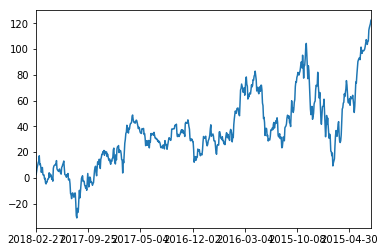

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
data["p_change"].cumsum().plot() ## series画图
plt.show() ## 但是这里时间不对 时间应该按照顺序累加

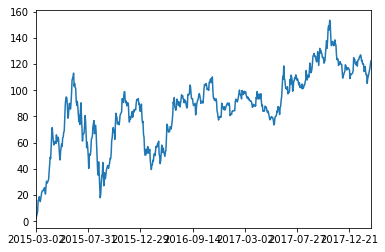

In [181]:
## 首先先进行时间排序
import matplotlib.pyplot as plt
data["p_change"].sort_index().cumsum().plot()
plt.show()

## 3.5自定义运算
- **apply(func,axis=0)**
    - func:自定义函数
    - axis=0:默认是列，axis=1为行进行运算
- 定义一个对列，最大值-最小值的函数
    - **data[['open','close']].apply(lambda x: x.max()-x.min(),axis=0)**


In [183]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover,price change,price change222
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39,0.63,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53,0.73,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32,-0.06,-0.06
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90,0.03,0.03
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58,0.43,0.43


In [186]:
data[['open','close']].apply(lambda x: x.max() - x.min())

open     22.74
close    22.85
dtype: float64

In [187]:
data.apply(lambda x: x.max() - x.min())

open                   22.74
high                   23.68
close                  22.85
low                    21.81
volume             500757.29
price_change            6.55
p_change               20.06
turnover               12.52
price change            6.71
price change222         6.71
dtype: float64

# 4Pandas画图
- **pandas.DataFrame.plot**
    - DataFrame.plot(x=None,y=None,kind='line')
    - x:label or position, default None
    - y:label, position or list of label, position, default None
        - allows plotting of one column versus another
    - kind: str
        - line: line plot(default) 折线
        - bar: vertical bar plot 柱状图
        - barh: horizontal bar plot 
        - hist: histogram 直方图
        - pie: pie plot 饼图
        - scatter: scatter plot 散点图

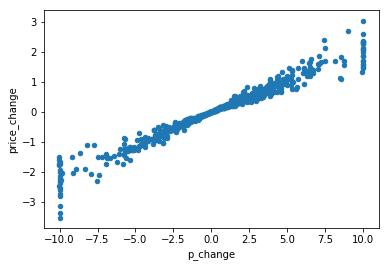

In [189]:
data.plot(x = 'p_change',y = 'price_change',kind = 'scatter')
plt.show()

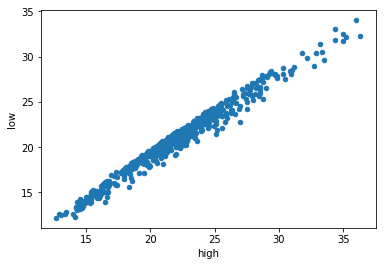

In [190]:
data.plot(x = 'high',y = 'low',kind = 'scatter')
plt.show()

# 5文件读取与存储
## 5.1CSV是什么
### 5.1.1读取CSV文件
- **pandas.read_csv(filepath_or_buffer,sep=',',delimiter=None)**
    - **filepath_or_buffer**: 文件路径
    - **usecols**:指定读取的列名，列表形式

In [191]:
pd.read_csv('stock_day.csv', usecols=['open','high','close','volume']).head()

,open,high,close,volume
2018-02-27,23.53,25.88,24.16,95578.03
2018-02-26,22.80,23.78,23.53,60985.11
2018-02-23,22.88,23.37,22.82,52914.01
2018-02-22,22.25,22.76,22.28,36105.01
2018-02-14,21.49,21.99,21.92,23331.04


In [193]:
pd.read_csv('stock_day2.csv').head()   ## 默认第一行做字段了

,2018-02-27,23.53,25.88,24.16,23.53.1,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
0,2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
1,2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2,2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
3,2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
4,2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77


In [196]:
data = pd.read_csv('stock_day2.csv', names = ["open", "high", "close", "low", "volume", "price_change", "p_change", "ma5", "ma10", "ma20", "v_ma5", "v_ma10", "v_ma20", "turnover"])
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


### 5.1.2存储CSV文件
- **DataFrame.to_csv(path_or_buf=None,sep='',columns=None,header=True,index=True,index_label=None,mode='w',encoding=None)**
    - model:w追加模式，a追加
- **Series.to_csv(path)**

In [197]:
# 保存open列的数据
data[:10].to_csv("opentest.csv",columns=['open'])

In [198]:
# 再读取
pd.read_csv("opentest.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [199]:
# 不要行索引
data[:10].to_csv("opentest.csv",columns=['open'],index=False)

In [200]:
# 再读取
pd.read_csv("opentest.csv")

,open
0,23.53
1,22.80
2,22.88
3,22.25
4,21.49
5,21.40
6,20.70
7,21.20
8,21.79
9,22.69


In [201]:
data[:10].to_csv("opentest.csv",columns=['open'],index=False,mode ="a") # 在原基础添加

In [202]:
pd.read_csv("opentest.csv")

,open
0,23.53
1,22.8
2,22.88
3,22.25
4,21.49
5,21.4
6,20.7
7,21.2
8,21.79
9,22.69


In [203]:
data[:10].to_csv("opentest.csv",columns=['open'],index=False,mode ="a",header = False)

In [204]:
pd.read_csv("opentest.csv") # 去除open header

,open
0,23.53
1,22.8
2,22.88
3,22.25
4,21.49
5,21.4
6,20.7
7,21.2
8,21.79
9,22.69


## 5.2HDF5是什么
- **read_hdf(path_or_buf,key=None,kwargs)**
- **to_hdf()**
- HDF5存储3维数据的文件
    - key1 dataframe1二维数据
    - key2 dataframe2二维数据
- HDF5文件的读取和存储都需要指定一个键，值为要存储的DataFrame
    - pandas.read_hdf(path_or_buf, key =None, **kwargs)

In [206]:
day_close = pd.read_hdf("day_close.h5")
day_close.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
day_close.to_hdf("test.h5")

TypeError: to_hdf() missing 1 required positional argument: 'key'

In [208]:
day_close.to_hdf("test.h5",key="close")

In [209]:
pd.read_hdf("test.h5").head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
pd.read_hdf("test.h5",key="close").head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
day_open = pd.read_hdf("day_open.h5").head()

In [218]:
day_open.to_hdf('test.h5',key='open')

In [224]:
pd.read_hdf('test.h5',key='close').head()   ### test里面有两个key，一个close一个open，我们读取的是包含key这个关键词的文件

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2.1HDF5优点
- 优先选择使用HDF5文件储存
    - HDF5在存储的是支持压缩，使用的方法是blosc，这是速度最快也是pandas默认支持的
    - 使用压缩可以提高磁盘利用率，节省空间
    - HDF5还是跨平台的，可以轻松迁移到hadoop上面

## 5.3JSON是什么
- Json是我们常见的一种数据交换格式，前面在前后端的交互经常用到，也会在存储的时候选择这种格式。所以我们需要知道pandas如何进行读取和存储Json格式
- pandas.read_json(path_or_buf=None, orient=None,typ='frame',lines=False)
    - orient = 'records'
    - lines: boolean, default False
        - 是否按行读取json对象

In [225]:
article = pd.read_json("Sarcasm_Headlines_Dataset.json", orient = 'records', lines=True)
article.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [226]:
article.to_json("test.json", orient="records", lines=True)

# 6缺失值处理
## 6.1NAN如何处理
- 判断数据是否为NAN: 
    - **pd.isnull(df)**, **pd.notnull(df)**,**pd.isnull(df).any()**, **pd.notnull(df).all()**
- 删除含有缺失值的样本
    - **df.dropna(axis='rows')**
    - **df.dropna(inplace=False)** 默认inplace=False
        - True会就地删除缺失值，原数据不变
        - 不会修改原数据，需要接受返回值       
- 替换/插补 
    - **df.fillna(value, inplace=False)**
        - **value**: 替换成的值
        - **inplace**:
            - True: 就地填补，会修改原数据
            - False: 不替换修改原数据，生成新的对象
- 电影数据文件获取

In [228]:
import pandas as pd
movie = pd.read_csv('./IMDB-Movie-Data.csv')
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 6.2.1判断是否存在缺失值

In [231]:
pd.isnull(movie).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [232]:
np.any(pd.isnull(movie)) ## 返回true，说明数据中存在缺失值

True

In [233]:
pd.notnull(movie).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True


In [234]:
np.all(pd.notnull(movie)) ## 返回false，说明数据中存在缺失值

False

In [235]:
pd.isnull(movie).any() ## 返回每一个字段，是否有缺失值，说明revenue和metascore存在缺失值

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [10]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

### 6.2.2缺失值处理
- 方法1： 删除含有缺失值的样本
- 方法2： 替换

#### 6.2.2.1删除含有缺失值的样本

In [236]:
data1 = movie.dropna()  ##返回一个已经删除好的新数据
data1.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [237]:
pd.notnull(data1).all()     ## 就不存在缺失值了

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

#### 6.2.2.2替换
- 含有缺失值的字段
   - Revenue (Millions)    False
   - Metascore             False

In [238]:
movie["Revenue (Millions)"].fillna(movie['Revenue (Millions)'].mean(),inplace=True)
movie["Metascore"].fillna(movie['Metascore'].mean(),inplace=True)

In [242]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [240]:
pd.isnull(movie).any()  ## 就不再存在缺失值

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

In [241]:
pd.notnull(movie).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

## 6.3不是缺失值nan有默认标记的
- 替换，将问好替换成np.nan
    - **df.replace(to_replace='?',value=np.nan)**
- 处理np.nan

In [243]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
## 原数据没有索引，要记得添加索引名字
data = pd.read_csv(path, names=name)

In [244]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [249]:
# 替换
data_new = data.replace(to_replace='?',value=np.nan)
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [250]:
# 删除缺失值
data_new.dropna(inplace=True)
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [251]:
data_new.isnull().any() #全部返回false，说明不存在缺失值了

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

# 7数据离散化
## 7.1什么是数据离散化
- 连续属性的离散化就是将连续属性的值域上，将值域划分为若干个离散的区间，最后用不同的符号或者整数值代表落在每个子区间中的属性值
- 表现形式ont-hot编码，也叫哑变量
## 7.2为什么要离散化
- 连续属性离散化的目的是为了简化数据结构，数据离散化技术可以用来减少给定连续属性值的个数，离散化方法经常作为数据挖掘的工具
## 7.3如何实现数据的离散化
- 对分好组的数据求哑变量
    - **pandas.get_dummies(data,prefix=None)**
        - data: array-like, Series, or DataFrame
        - prefix: 分组名字，前缀
- 对数据进行分组
    - 对数据进行分组将数据分组 一般会与value_counts搭配使用，统计每组的个数
        - **series.value_counts()**: 统计分组每组成员个数

In [258]:
# 准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184'])
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

### 7.3.1自动分组

In [253]:
# 分组
## 自动分组
sr = pd.qcut(data,3)

In [254]:
type(sr)

pandas.core.series.Series

In [255]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [256]:
sr.value_counts() # 可以观察没个区间有多少人

(178.0, 192.0]        3
(158.999, 163.667]    3
(163.667, 178.0]      2
dtype: int64

In [259]:
# 转化成哑变量
pd.get_dummies(sr,prefix="身高")

,"身高_(158.999, 163.667]","身高_(163.667, 178.0]","身高_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


### 7.3.2自定义分组

In [260]:
# 自定义分组
bins = [150, 165, 180, 195]
sr = pd.cut(data,bins)

In [262]:
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64]): [(150, 165] < (165, 180] < (180, 195]]

In [263]:
sr.value_counts()

(150, 165]    4
(180, 195]    2
(165, 180]    2
dtype: int64

In [271]:
pd.get_dummies(sr, prefix="身高")

,"身高_(150, 165]","身高_(165, 180]","身高_(180, 195]"
No1:165,1,0,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,1,0
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


## 7.4股票案例分析

In [266]:
### 股票涨跌幅离散化处理 p_change
# 读取数据
stock = pd.read_csv("stock_day.csv")
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [267]:
p_change = stock['p_change']

In [269]:
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [277]:
# 分组
## 自动分组
sr = pd.qcut(p_change,10)
sr.head()

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
Name: p_change, dtype: category
Categories (10, interval[float64]): [(-10.031, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [274]:
sr.value_counts()

(5.27, 10.03]        65
(0.26, 0.94]         65
(-0.462, 0.26]       65
(-10.031, -4.836]    65
(2.938, 5.27]        64
(1.738, 2.938]       64
(-1.352, -0.462]     64
(-2.444, -1.352]     64
(-4.836, -2.444]     64
(0.94, 1.738]        63
Name: p_change, dtype: int64

In [276]:
## 离散化
pd.get_dummies(sr,prefix="涨跌幅").head()

,"涨跌幅_(-10.031, -4.836]","涨跌幅_(-4.836, -2.444]","涨跌幅_(-2.444, -1.352]","涨跌幅_(-1.352, -0.462]","涨跌幅_(-0.462, 0.26]","涨跌幅_(0.26, 0.94]","涨跌幅_(0.94, 1.738]","涨跌幅_(1.738, 2.938]","涨跌幅_(2.938, 5.27]","涨跌幅_(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0


In [278]:
## 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr = pd.cut(p_change,bins)

In [279]:
sr.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [282]:
stock_change = pd.get_dummies(sr,prefix="rise")
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


# 8合并
- numpy合并
    - **np.concatnate((a,b),axis=)**
    - **np.hstack()** 水平拼接
    - **np.vstack()** 竖直拼接
## 8.1应用pd.concat实现数据的合并
- 按方向拼接
    - **pd.concat([data1,data2],axis=0)** 默认为0，竖直拼接
        - 按照行或列进行合并，axis=0为列索引，axis=1为行索引
- 处理好的one-hot编码与原数据合并

In [283]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [285]:
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


In [287]:
## 水平拼接
pd.concat((stock,stock_change),axis=1).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0


In [289]:
# 竖直拼接
pd.concat((stock,stock_change),axis=0).head()

,close,high,low,ma10,ma20,ma5,open,p_change,price_change,"rise_(-100, -7]",...,"rise_(-7, -5]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]",turnover,v_ma10,v_ma20,v_ma5,volume
2018-02-27,24.16,25.88,23.53,22.142,22.875,22.942,23.53,2.68,0.63,NaN,...,NaN,NaN,NaN,NaN,NaN,2.39,46738.65,55576.11,53782.64,95578.03
2018-02-26,23.53,23.78,22.80,21.955,22.942,22.406,22.80,3.02,0.69,NaN,...,NaN,NaN,NaN,NaN,NaN,1.53,42736.34,56007.50,40827.52,60985.11
2018-02-23,22.82,23.37,22.71,21.929,23.022,21.938,22.88,2.42,0.54,NaN,...,NaN,NaN,NaN,NaN,NaN,1.32,41871.97,56372.85,35119.58,52914.01
2018-02-22,22.28,22.76,22.02,21.909,23.137,21.446,22.25,1.64,0.36,NaN,...,NaN,NaN,NaN,NaN,NaN,0.90,39904.78,60149.60,35397.58,36105.01
2018-02-14,21.92,21.99,21.48,21.923,23.253,21.366,21.49,2.05,0.44,NaN,...,NaN,NaN,NaN,NaN,NaN,0.58,42935.74,61716.11,33590.21,23331.04


## 8.2应用pd.merge按索引实现数据的合并
- 按索引进行拼接
    - **pd.merge(left,right,how='inner',on=None,left_on=None,right_on=None,left_index=False,right_index=False,sort=True,suffixes=('_x','_y'),copy=True,indicator=False,validate=None)**
    - left, right, how = inner, on = [索引]
    - merge methond
        - left
        - right 
        - outer
        - inner

In [290]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [291]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [292]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [293]:
pd.merge(left,right,how = "inner",on=["key1","key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [294]:
pd.merge(left,right,how = "left",on=["key1","key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


In [295]:
pd.merge(left,right,how = "right",on=["key1","key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [296]:
pd.merge(left,right,how = "outer",on=["key1","key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


# 9交叉表与透视表
## 9.1交叉表和透视表的作用
- 探索两个变量之间的关系
    - 股票的涨跌和星期几的关系
## 9.2交叉表crosstable实现
- 使用交叉表用于计算一列数据对于另外一列数据的分组个数（寻找两个列之间的关系）
    - **pd.crosstab(value1,value2)**
    - pd.crosstab(星期数据列，涨跌幅数据列)
- pandas日期类型API **pd.to_datetime(data)**
- 频率计算 **data.div(data.sum(axis=1), axis=0)**

In [297]:
stock.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [299]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [300]:
# pandas日期类型API pd.to_datetime(data)
date = pd.to_datetime(stock.index)
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [301]:
date.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', length=643)

In [302]:
date.month

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=643)

In [303]:
date.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [305]:
#原始数据中加上week这一列
stock["week"] = date.weekday
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [307]:
# 添加一列涨跌幅数据列 是一个判断 用到numpy
stock['pona'] = np.where(stock['p_change']>0,1,0)
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,pona
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [316]:
# 调用交叉表api
data = pd.crosstab(stock['week'],stock['pona'])
data

pona,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [319]:
# 每一行的总和
data.sum(axis=1)

week
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [320]:
data.div(data.sum(axis=1))

,0,1,2,3,4
week,,,,,
0,0.504,0.473282,NaN,NaN,NaN
1,0.440,0.580153,NaN,NaN,NaN
2,0.488,0.541985,NaN,NaN,NaN
3,0.504,0.496183,NaN,NaN,NaN
4,0.472,0.519084,NaN,NaN,NaN


In [321]:
# 频率
data.div(data.sum(axis=1), axis=0)

pona,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


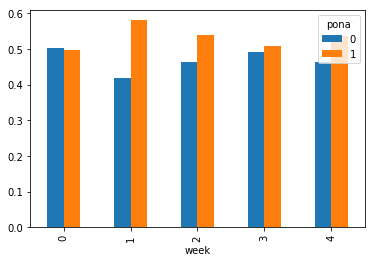

In [312]:
import matplotlib.pyplot as plt
data.div(data.sum(axis=1), axis=0).plot(kind="bar")
plt.show()

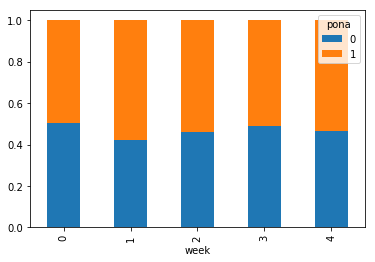

In [313]:
 ## stack是否堆叠
import matplotlib.pyplot as plt
data.div(data.sum(axis=1), axis=0).plot(kind="bar",stacked=True)
plt.show()

## 9.3透视表pivot_table实现
- **df.pivot_table([],index=[])**

In [314]:
## 用交叉表的出来的比例
data.div(data.sum(axis=1), axis=0)

pona,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


In [315]:
## 用透视表的出来的比例
stock.pivot_table(["pona"], index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


# 10分组与聚合
## 10.1什么是分组与聚合
- 分组与聚合通常是分析数据的一种方式，通常与一些统计函数一起使用，查看数据的分组情况
## 10.2api分组
- **df.groupby(key,as_index=False)**
    - key: 分组的
    - **col.groupby(by='color')['price1'].max()**
    - **col["price1"].groupby(col["color"]).max()**
- **Series**

In [323]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [325]:
# 进行分组，对颜色分组，price1进行聚合
# 用dataFrame进行分组
col.groupby(by='color')['price1'].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [331]:
#series 
col["price1"] 

0    5.56
1    4.20
2    1.30
3    0.56
4    2.75
Name: price1, dtype: float64

In [337]:
# 按颜色分组 求各颜色的price1下的数量
col["price1"].groupby(col["color"]).count()

color
green    2
red      2
white    1
Name: price1, dtype: int64

## 10.3星巴克零售店数据案例

In [9]:
# 1.准备数据
Starbucks = pd.read_csv("directory.csv")
Starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [342]:
# 按照国家分组，求出每个国家的星巴克零售店数量
Starbucks.groupby("Country").count().head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


In [10]:
Starbucks.groupby("Country")["Brand"].count().head()

Country
AD      1
AE    144
AR    108
AT     18
AU     22
Name: Brand, dtype: int64

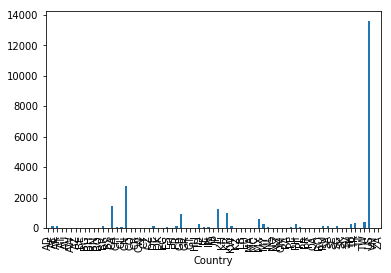

In [344]:
import matplotlib.pyplot as plt
Starbucks.groupby("Country").count()["Brand"].plot(kind="bar")
plt.show()

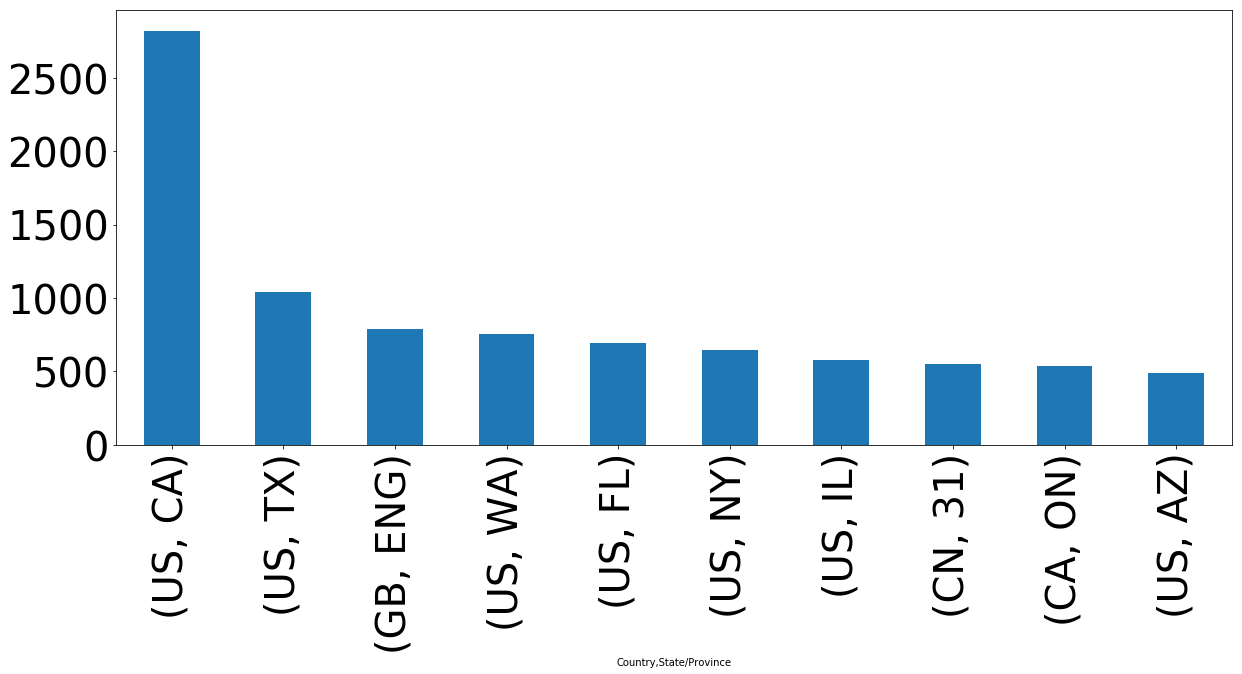

In [140]:
# 排序显示前10行
Starbucks.groupby(by =["Country",'State/Province']).count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar",figsize=(20,8),fontsize=40)
plt.show()

In [345]:
Starbucks.groupby(by =["Country",'State/Province']).count().head()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2

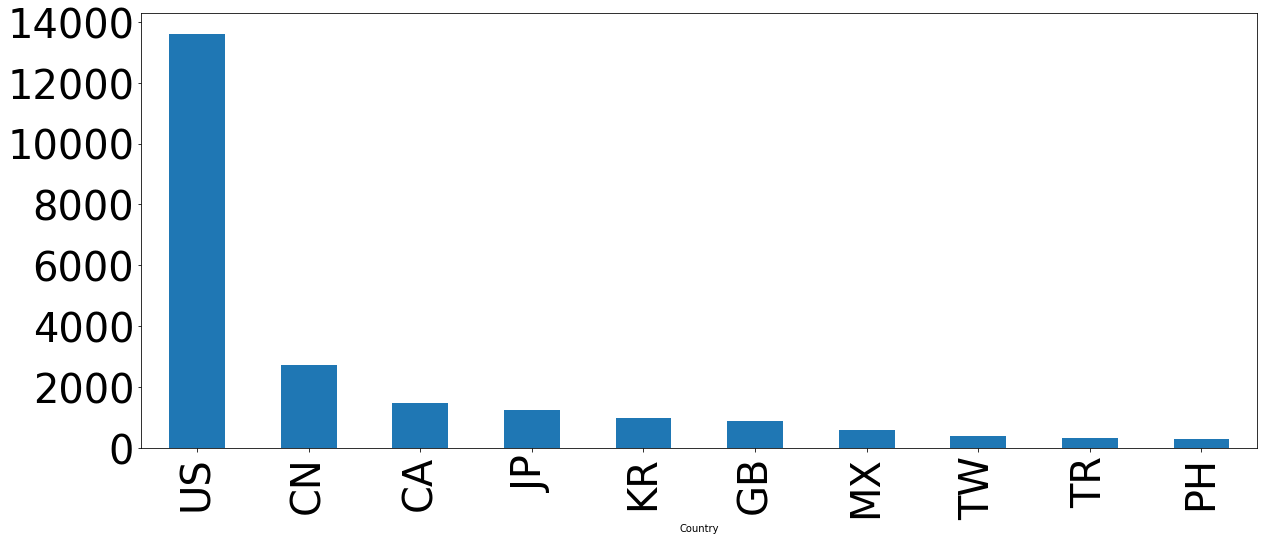

In [346]:
import matplotlib.pyplot as plt
Starbucks.groupby("Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar",figsize=(20,8),fontsize=40)
plt.show()